In [1]:
#@title Importing Packages

# Utility
import math as math
import numpy as np
import pandas as pd
import random as rdm
import scipy.io as io
import scipy.stats as stats
from google.colab import drive
import networkx as nx
import time

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.animation import FuncAnimation
from functools import partial

In [2]:
def findMode(sample):

    mode = 0
    count = 0
    for value in set(sample):
        countValue = sum([1 for num in sample if num == value])
        if countValue >= count:
            mode = value
            count = countValue
    
    return mode, count


In [3]:
#@title Function to plot pdf of distribution

def plotPDF(dist, mean, true):

    sample = dist.rvs(100000)
    plt.hist(sample, bins = int(len(sample)/100), alpha = 0.5)

    plt.scatter(mean, 0, s = 100, c = 'r', label = 'Mean')
    plt.scatter(true, 0, s = 100, c = 'g', label = 'True value')

    plt.legend()
    plt.show()



In [4]:
#@title Function to plot pmf of distribution

def plotPMF(dist, mean, true):

    sample = dist.rvs(100000)
    plt.hist(sample, bins = int(len(sample)/100), alpha = 0.5)

    plt.scatter(mean, 0, s = 100, c = 'r', label = 'Mean')
    plt.scatter(true, 0, s = 100, c = 'g', label = 'True value')

    plt.legend()
    plt.show()


In [5]:
#@title function to plot walk of single parameter

def plotWalk(sample, true):

    plt.plot(range(len(sample)), sample)
    plt.plot([0, len(sample)], [true, true], label = 'True value')
    plt.legend()
    plt.show()

# Binomial

The true value of p is 0.512


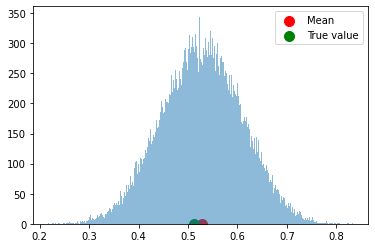

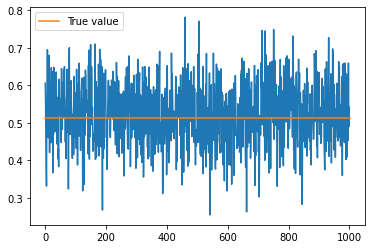

In [6]:
#@title Gibbs sampler for binomial distribution
pTrue = stats.uniform.rvs()

likelihood = stats.binom(1, pTrue)
sample = likelihood.rvs(rdm.randint(0, 100))

a = 1
b = 1

n = len(sample)
y = sum(sample)

a = a + y
b = b + n - y

prior = stats.beta(a, b)
pSample = [prior.rvs()]

for i in range(1000):

    mean = a/(a + b)
    posterior = stats.beta(a, b)
    pSample.append(posterior.rvs())

print(f"The true value of p is {format(pTrue, '.3f')}")
plotPDF(posterior, mean, pTrue)
plotWalk(pSample, pTrue)

In [7]:
stats.binom(1, pTrue).pmf(1)

0.5120555576027029

In [8]:
#@title Metropolis-Hastings for binomial - Working?
pTrue = stats.uniform.rvs()

likelihood = stats.binom(1, pTrue)
sample = likelihood.rvs(100)

a = 1 + sum(sample)
b = 1 + len(sample) - sum(sample)
ybar = np.mean(sample)

prior = stats.beta(a, b)
pSample = [prior.rvs()]

xNaught = stats.uniform(0, 1).rvs()
S = 10000
posterior = np.zeros((S,))

for t in range(S):
    posterior[t] = xNaught

    x = stats.uniform.rvs() 

    p1 = prior.pdf(x)
    p2 = prior.pdf(xNaught)

    #print(f"Values: {x}, {xNaught}")
    #print(f"p: {p1}, {p2}")

    alpha = p1/p2
    u = stats.uniform(0, 1).rvs()

    if u < alpha:
        print(f"Accepted: {t}")
        xNaught = x # accept
    #print("")


Accepted: 5
Accepted: 13
Accepted: 29
Accepted: 31
Accepted: 32
Accepted: 33
Accepted: 34
Accepted: 41
Accepted: 46
Accepted: 48
Accepted: 57
Accepted: 61
Accepted: 72
Accepted: 76
Accepted: 80
Accepted: 81
Accepted: 82
Accepted: 85
Accepted: 89
Accepted: 90
Accepted: 96
Accepted: 97
Accepted: 98
Accepted: 105
Accepted: 108
Accepted: 114
Accepted: 124
Accepted: 132
Accepted: 135
Accepted: 140
Accepted: 141
Accepted: 143
Accepted: 151
Accepted: 152
Accepted: 159
Accepted: 167
Accepted: 170
Accepted: 175
Accepted: 177
Accepted: 184
Accepted: 210
Accepted: 214
Accepted: 233
Accepted: 257
Accepted: 258
Accepted: 262
Accepted: 264
Accepted: 268
Accepted: 269
Accepted: 271
Accepted: 272
Accepted: 275
Accepted: 276
Accepted: 277
Accepted: 291
Accepted: 300
Accepted: 309
Accepted: 328
Accepted: 335
Accepted: 340
Accepted: 341
Accepted: 342
Accepted: 361
Accepted: 364
Accepted: 375
Accepted: 390
Accepted: 396
Accepted: 400
Accepted: 404
Accepted: 411
Accepted: 414
Accepted: 419
Accepted: 421
Ac

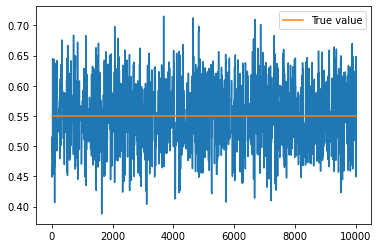

In [9]:
plotWalk(posterior, ybar)

(array([  2.,   0.,   4.,  19.,   0.,  39.,  16.,  14.,  38.,  72.,  88.,
         87., 136., 141., 209., 182., 339., 448., 467., 390., 532., 382.,
        462., 584., 549., 473., 489., 433., 444., 379., 355., 404., 223.,
        271., 314., 248., 193., 145., 108.,  63., 123.,  64.,  18.,  11.,
          9.,   7.,   9.,   8.,   0.,   9.]),
 array([0.38783077, 0.3943741 , 0.40091742, 0.40746075, 0.41400407,
        0.42054739, 0.42709072, 0.43363404, 0.44017737, 0.44672069,
        0.45326402, 0.45980734, 0.46635066, 0.47289399, 0.47943731,
        0.48598064, 0.49252396, 0.49906729, 0.50561061, 0.51215393,
        0.51869726, 0.52524058, 0.53178391, 0.53832723, 0.54487055,
        0.55141388, 0.5579572 , 0.56450053, 0.57104385, 0.57758718,
        0.5841305 , 0.59067382, 0.59721715, 0.60376047, 0.6103038 ,
        0.61684712, 0.62339045, 0.62993377, 0.63647709, 0.64302042,
        0.64956374, 0.65610707, 0.66265039, 0.66919372, 0.67573704,
        0.68228036, 0.68882369, 0.69536701, 0.

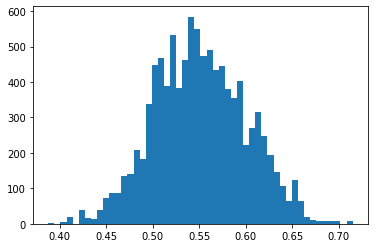

In [10]:
plt.hist(posterior, bins = 50)

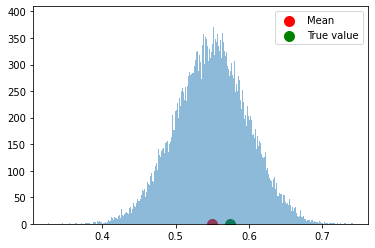

In [11]:
plotPDF(prior, ybar, pTrue)

# Normal

In [12]:
#@title Replicating R's variance function

def variance(sample):

    var = np.var(sample)*n/(n - 1)

    return var

## Gibbs Sampler

In [13]:
#@title Gibbs Sampler for normal distribution - Mu working, Sigma squared working?

# Initial sample
y = [1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08]
n = len(y) 
ybar = np.mean(y)
s2 = variance(y)

print(ybar, s2)

# Prior
mu0 = 1.9
kappa0 = 1
t20 = (mu0/stats.norm.ppf(0.975))
s20 = 0.01
nu0 = 1

print(mu0, s20)
# Initialising array
S = 10000
phi = [ybar, s2]
PHI = np.zeros((S, 2))
PHI[0, :] = phi

rdm.seed(1)
for s in range(1, S):

    mun = (mu0/t20 + n*ybar/phi[1])/(1/t20 + n/phi[1])
    t2n = 1/(1/t20 + n/phi[1])

    phi[0] = stats.norm(mun, np.sqrt(t2n)).rvs(1)

    # Sample sigmaˆ2 from its full conditional based on theta

    nun = nu0 + n
    kappan = kappa0 + n
    s2n = (nu0*s20 + (n - 1)*s2 + n*(ybar - phi[0])**2)/nun

    # This posterior distribution: inverse-gamma(nu_n/2,sigmaˆ2_n(\theta)
    phi[1] = stats.invgamma(nun/2, scale = s2n*nun/2).rvs(1)

    PHI[s, :] = phi


1.8044444444444447 0.016877777777777787
1.9 0.01


<ipython-input-13-8f4524492820>:42: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  PHI[s, :] = phi


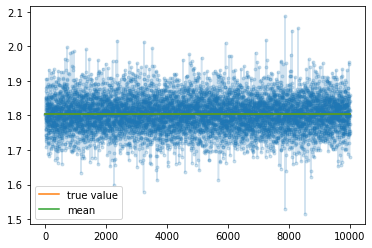

In [14]:
#@title Plotting walk of mean

plt.plot(range(10000), PHI[:, 0], '.-', alpha = 0.2)
plt.plot([0, 10000], [ybar, ybar], label = 'true value')
plt.plot([0, 10000], [np.mean(PHI[:, 0]), np.mean(PHI[:, 0])], label = 'mean')

plt.legend()

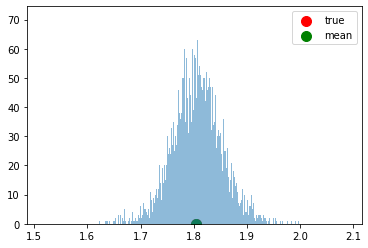

In [15]:
#@title Plotting histogram of mean

plt.hist(PHI[:, 0], bins = 1000, alpha = 0.5)
plt.scatter(ybar, 0, s = 100, c = 'r', label = 'true')
plt.scatter(np.mean(PHI[:, 0]), 0, s = 100, c = 'g', label = 'mean')

plt.legend()

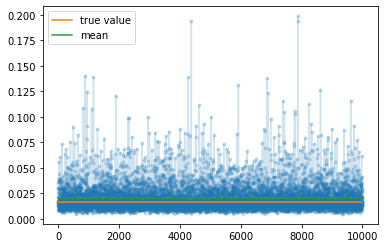

In [16]:
#@title Plotting walk of sigma-squared

plt.plot(range(10000), (PHI[:, 1]), '.-', alpha = 0.2)
plt.plot([0, 10000], [s2, s2], label = 'true value')
plt.plot([0, 10000], [np.mean(PHI[:, 1]), np.mean(PHI[:, 1])], label = 'mean')

plt.legend()

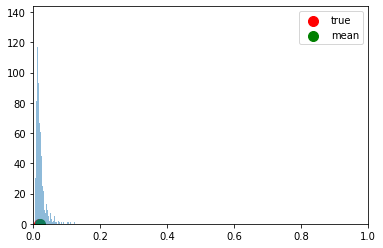

In [17]:
#@title Plotting histogram of sigma-squared

plt.hist((PHI[:, 1]), bins = 1000, alpha = 0.5)
plt.scatter(s2, 0, s = 100, c = 'r', label = 'true')
plt.scatter(np.mean((PHI[:, 1])), 0, s = 100, c = 'g', label = 'mean')
plt.xlim(0, 1)
plt.legend()

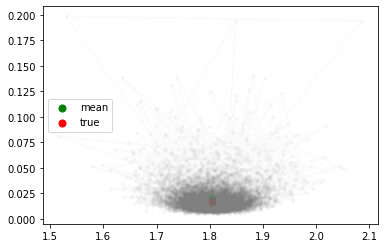

In [18]:
#@title Plotting mean vs sigma-squared

plt.scatter(np.mean(PHI[:, 0]), np.mean(PHI[:, 1]), s = 50, c = 'g', label = 'mean')
plt.plot(PHI[:, 0], PHI[:, 1], '.-', alpha = 0.04, c = 'grey')
plt.scatter(ybar, s2, s = 50, c = 'r', label = 'true')

plt.legend()

## Metropolis-hastings

In [35]:
#@title Metropolis-Hastings for normal - Mu working, sigma-squared working?

# Intiialising likelihood distribution
muL = stats.uniform(1, 7).rvs()
s2L = stats.uniform(0, 0.1).rvs()
likelihood = stats.norm(muL, np.sqrt(s2L))

# Initialising sample
sample = likelihood.rvs(5)
n = len(sample)
ybar = np.mean(sample)
s2 = variance(sample)

print(ybar, s2)

# Initialising prior values
mu0 = stats.uniform(1, 7).rvs()
kappa0 = 1
t20 = (mu0/stats.norm.ppf(0.975))
s20 = 0.01
nu0 = 1

S = 10000
phi = [ybar, s2]

PHI = np.zeros((S, 2))
PHI[0, :] = [mu0, s20]

for t in range(S):
    sample = likelihood.rvs(int(stats.uniform(50, 100).rvs()))
    n = len(sample)
    ybar = np.mean(sample)
    s2 = variance(sample)

  # Get starting probabilities for prior values of mu and sigma
    # Mu
    
    mun = (mu0/t20 + n*ybar/phi[1])/(1/t20 + n/phi[1])
    t2n = 1/(1/t20 + n/phi[1])
    pPriorMu = stats.norm(mun, np.sqrt(t2n)).pdf(mu0)

    # Sigma
    nun = nu0 + n
    kappan = kappa0 + n
    s2n = (nu0*s20 + (n - 1)*s2 + n*(ybar - phi[0])**2)/nun
    pPriorS2 = stats.invgamma(nun/2, scale = s2n*nun/2).pdf(s20)

    # Candidates
    # Candidate for mu
    mu = stats.norm(mu0).rvs() # candidate
    sigma2 = stats.norm(s20).rvs()

    pCandidateMu = stats.norm(mun, np.sqrt(t2n)).pdf(mu)
    #print("Mu:")
    #print("Values: ", mu0, mu)
    #print("Probabilities: ", pCandidateMu, pPriorMu)
    
    alpha = pCandidateMu/pPriorMu
    u = stats.uniform(0, 1).rvs() # random uniform

    if u < alpha:
        mu0 = mu # accept

    #print("")

    # Candidate for sigma-squared

    pCandidateS2 = stats.invgamma(nun/2, scale = s2n*nun/2).pdf(sigma2)
    #print("Sigma-Squared:")
    #print("Values: ", s20, sigma2)
    #print("Probabilities: ", pCandidateS2, pPriorS2)
    
    beta = pCandidateS2/pPriorS2 # ratio
    u = stats.uniform(0, 1).rvs() # random uniform

    if u < beta:
        s20 = sigma2 # accept

    #print("")

    PHI[t, :] = [mu0, s20]
    #print("")



6.437491321544719 0.09145107200400907


<ipython-input-35-6a958dd0f3ed>:59: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = pCandidateMu/pPriorMu


Computing time was 0 hours 1 minutes and 21 seconds


In [ ]:
#@title Plotting walk of Mean

plotWalk(PHI[:, 0], ybar)

In [ ]:
#@title Plotting histogram of mean samples

plt.hist(PHI[:, 0], bins = 100, alpha = 0.5)
plt.scatter(np.mean(PHI[:,0]), 0, s = 100, c = 'r')
plt.scatter(muL, 0, s = 100, c = 'k')

In [ ]:
#@title Plotting pdf of mean posterior

plotPDF(stats.norm(mun, np.sqrt(t2n)), ybar, muL)

In [ ]:
#@title Plotting walk of sigma-squared

plotWalk(PHI[:, 1], s2L)

In [ ]:
#@title Plotting histogram of sigma-squared samples

plt.hist(PHI[:, 1], bins = 100, alpha = 0.5)
plt.scatter(np.mean(PHI[:,1]), 0, s = 100, c = 'r')
plt.scatter(s2L, 0, s = 100, c = 'k')

In [ ]:
#@title Plotting pdf of sigma-squared posterior

plotPDF(stats.invgamma(nun/2, scale =  nun*s2n/2), np.mean(PHI[:,1]), s2L)

In [ ]:
#@title Plotting mean vs sigma-squared

plt.scatter(np.mean(PHI[:, 0]), np.mean(PHI[:, 1]), s = 50, c = 'g', label = 'mean')
plt.plot(PHI[:, 0], PHI[:, 1], '.-', alpha = 0.04, c = 'grey')
plt.scatter(ybar, s2, s = 50, c = 'r', label = 'true')

plt.legend()

# Toy example for algae bloom

In [6]:
drive.mount('drive')

pmatRaw = pd.read_csv("https://drive.google.com/uc?export=download&id=18qzQ-2TRETglAGLSXRZekyQqK7QxXUff")
pmat = pmatRaw.copy()
pmat = pmat.set_index('Unnamed: 0')

Mounted at drive


In [7]:
#@title Calculates Mit based upon parameters and Mi(t - 1)

def findMNew(M, i, t, A, Alpha, Beta, StartBloom, S, pmat):

  start = S*StartBloom
  growth = Alpha*A*M[i]
  transport = Beta*sum(pmat.iloc[i, :]*M)
  MNew = start + growth + transport

  return MNew

In [8]:
#@title generates sample with randomly generated parameter
def runSimulation(sites, length, pmat, seed):

    rdm.seed(seed)

    Alpha = stats.gamma(1, 1).rvs()
    Beta = stats.beta(1, 1).rvs()

    # Forcing N = 1 for MH purposes
    N = 1
    # N =  int(stats.geom.rvs(0.05))
    A = np.zeros((length, sites))

    for n in range(N):
        i = int(stats.uniform.rvs(0, sites))
        T = int(stats.uniform.rvs(0, length))
        W = int(stats.nbinom.rvs(6, 0.75))

        A[range(T, (min(T + W, length))), i] = 1

    S = np.zeros(sites)
    M = np.zeros(sites)
    MArray = np.zeros((sites, length))

    #print(f"Alpha: {Alpha}")
    #print(f"Beta: {Beta}")
    #print(f"T: {T}")
    #print(f"W: {W}")

    for t in range(length):
      for i in range(sites):

        if A[t, i] - A[max(t - 1, 0), i] == 1:
          StartBloom = 1
          #print(f"Week {t} - Bloom started at site {i}")
          S[i] = stats.gamma.rvs(1, 1)
          #print(f"S = {S[i]}")
        else:
          StartBloom = 0

        M[i] = findMNew(M, i, t, A[t, i], Alpha, Beta, StartBloom, S[i], pmat.iloc[:sites, :sites])
        MArray[i, t] = M[i]

    return MArray, Alpha, Beta, N, A, S

In [9]:
#@title Runs simulation with given parameters

def getSample(sites, length, pmat, alpha, beta, N, I, T, W, Size, seed):

    rdm.seed(seed)
    if (len(T) != N) or (len(W) != N) or (len(Size) != N) or (len(I) != N):
        print(N)
        print(len(T), len(W), len(Size))
        print("Error: Wrong length parameter vectors")
        return

    A = np.zeros((length, sites))
    for n in range(N):
        A[range(T[n], (min(T[n] + W[n], length))), I[n]] = 1

    S = np.zeros(N)
    M = np.zeros(sites)
    MArray = np.zeros((sites, length))

    S = np.zeros(sites)
    M = np.zeros(sites)
    MArray = np.zeros((sites, length))
    #print(f"Alpha: {alpha}")
    #print(f"Beta: {beta}")
    #print(f"T: {T}")
    #print(f"W: {W}")

    eventCounter = 0
    for t in range(length):
      for i in range(sites):

        if A[t, i] - A[max(t - 1, 0), i] == 1:
          StartBloom = 1
          #print(f"Week {t} - Bloom started at site {i}")
          S[i] = Size[eventCounter]
          eventCounter += 1
          #print(f"S = {S[i]}")
        else:
          StartBloom = 0

        M[i] = findMNew(M, i, t, A[t, i], alpha, beta, StartBloom, S[i], pmat.iloc[:sites, :sites])
        MArray[i, t] = M[i]

    return MArray

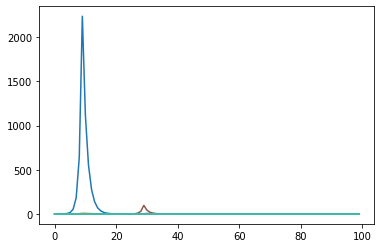

In [10]:
sites = 10
length = 100

massSample = getSample(sites, length, pmat, 3, 0.5, 2, [0, 5], [1, 24], [9, 6], [.1, 0.2], 69)
for i in range(sites):
    plt.plot(range(length), massSample[i])

In [15]:
#@title Function to convert mass into concentration

def convertConcentration(sites, length, M, V, delta):

    C = np.zeros((sites, length))
    for i in range(sites):
        C[i, :] = M[i, :]/V[i]
    LogCArray = np.log(delta + C)

    return LogCArray

In [24]:
#@title Converting Concentration to Y

def convertY(C, tau, seed):

    LogYArray = stats.norm(C, 1/np.sqrt(tau)).rvs()
    
    return LogYArray

Parameters known:
- t = length of time
- i = number of sites
- delta = dummy parameter to ensure log(delta + Mit/Vit) works
- V = (i x 1) vector of Volumes per site
---
Parameters to be estimated:
- Alpha = growth parameter
- Beta = decay parameter
- N = Number of events
- I = (n x 1) Vector of sites per event
- S = (i x t) Vector of Size Parameters
- A = (i x t) Vector of activation time
- T = (n x 1) vector of Start time parameters
- W = (n x 1) vector of Length of time parameters
- Epsilon = Error parameter

In [25]:
#@title MH sampler - Not even close

sites = 10
length = 100
delta = 0.0000000001
errorSquared = stats.gamma(1, 1).rvs()
V = stats.nbinom(1, .1).rvs(sites) + 1
seed = int(stats.uniform(1, 100).rvs())
rdm.seed(seed)

sample, trueAlpha, trueBeta, trueN, trueAArray, trueSArray = runSimulation(sites, length, pmat, seed)

CArray = convertConcentration(sites, length, sample, V, delta)
Y = convertY(CArray, 1/np.sqrt(errorSquared), 1)

# Prior parameters

  # Alpha
alphaA0 = 1
alphaB0 = 1
alphaPrior = stats.gamma(alphaA0, alphaB0)
alpha0 = alphaPrior.rvs()

  # Beta
betaA0 = 1
betaB0 = 1
betaPrior = stats.beta(betaA0, betaB0)
beta0 = betaPrior.rvs()

  # N
NA0 = 0.1
NPrior = stats.geom(NA0)
N0 = trueN
# N0 = int(NPrior.rvs())

  # I
IA0 = 0
IB0 = sites
IPrior = stats.uniform(IA0, IB0)
# I0 = [0]
I0 = [min(max(int(val), 0), sites - 10) for val in IPrior.rvs(N0)]

  # T
TA0 = 0
TB0 = 100
TPrior = stats.uniform(TA0, TB0)
# T0 = [int(TPrior.rvs())]
T0 = [max(min(int(val), length - 1), 0) for val in TPrior.rvs(N0)]

  # W
WA0 = 6
WB0 = 0.75
WPrior = stats.nbinom(WA0, WB0)
# W0 = [int(WPrior.rvs())]
W0 = [max(int(val), 0) for val in WPrior.rvs(N0)]

  # S
SA0 = 1
SB0 = 1
SPrior = stats.gamma(SA0, SB0)
# S0 = [SPrior.rvs()]
S0 = [int(val) for val in SPrior.rvs(N0)]

  # Tau
tauA0 = 1
tauB0 = 1
tauPrior = stats.gamma(tauA0, tauB0)
tau0 = tauPrior.rvs()

phi = [alpha0, beta0, N0, I0, T0, W0, S0, tau0]
S = 10000
PHI = dict.fromkeys(range(S))
PHI[0] = phi

alphaArray = np.zeros((S,))
betaArray = np.zeros((S,))
IArray = np.zeros((S, N0))
TArray = np.zeros((S, N0))
WArray = np.zeros((S, N0))
SArray = np.zeros((S, N0))
tauArray = np.zeros((S,))

alphaArray[0] = alpha0
betaArray[0] = beta0
IArray[0, :] = I0
TArray[0, :] = T0
WArray[0, :] = W0
SArray[0, :] = S0
tauArray[0] = tau0

alphaAccept = 0
betaAccept = 0
IAccept = 0
TAccept = 0
WAccept = 0
SAccept = 0
tauAccept = 0

start = time.time()
for s in range(1, S):
  # Alpha
    # Grabbing candidate alpha
    alphaCandidate = stats.norm(phi[0], 1).rvs()

    # Calculating mass and concentrations
    massSampleCandidate = getSample(sites, length, pmat, alphaCandidate, phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], seed)
    concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)

    massSamplePrior = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], seed)
    concSamplePrior = convertConcentration(sites, length, massSamplePrior, V, delta)

    # Calculating probability
    priorCandidateP = alphaPrior.pdf(alphaCandidate)
    priorPriorP = alphaPrior.pdf(phi[0])

    pArrayCandidate = np.zeros((sites, length))
    pArrayPrior = np.zeros((sites, length))

    pArrayCandidate = stats.norm(concSampleCandidate, 1/np.sqrt(phi[7])).pdf(Y)
    pArrayPrior = stats.norm(concSamplePrior, 1/np.sqrt(phi[7])).pdf(Y)

    likelihoodCandidateP = np.mean(np.mean(pArrayCandidate))
    likelihoodPriorP = np.mean(np.mean(pArrayPrior))

    pCandidate = priorCandidateP*likelihoodCandidateP
    pPrior = priorPriorP*likelihoodPriorP

    #print(pCandidate, pPrior)
    p = min(pCandidate/pPrior, 1)

    # Accept/Reject Alpha
    u = stats.uniform().rvs()
    if p >= u:
        print("Accepted Alpha: ", s)
        phi[0] = alphaCandidate
        alphaAccept += 1

    alphaArray[s] = phi[0]


  # Beta
    # Grabbing candidate beta
    betaCandidate = stats.norm(phi[1], .5).rvs()

    # Calculating mass and concentrations
    massSampleCandidate = getSample(sites, length, pmat, phi[0], betaCandidate, phi[2], phi[3], phi[4], phi[5], phi[6], seed)
    concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)

    massSamplePrior = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], seed)
    concSamplePrior = convertConcentration(sites, length, massSamplePrior, V, delta)

    # Calculating probability
    priorCandidateP = betaPrior.pdf(betaCandidate)
    priorPriorP = betaPrior.pdf(phi[1])

    pArrayCandidate = np.zeros((sites, length))
    pArrayPrior = np.zeros((sites, length))

    pArrayCandidate = stats.norm(concSampleCandidate, 1/np.sqrt(phi[7])).pdf(Y)
    pArrayPrior = stats.norm(concSamplePrior, 1/np.sqrt(phi[7])).pdf(Y)

    likelihoodCandidateP = np.mean(np.mean(pArrayCandidate))
    likelihoodPriorP = np.mean(np.mean(pArrayPrior))

    pCandidate = priorCandidateP*likelihoodCandidateP
    pPrior = priorPriorP*likelihoodPriorP

    #print(pCandidate, pPrior)
    p = min(pCandidate/pPrior, 1)

    # Accept/Reject Beta
    u = stats.uniform().rvs()
    if p >= u:
        print("Accepted Beta: ", s)
        phi[1] = betaCandidate
        betaAccept += 1

    betaArray[s] = phi[1]

    # I
    for site in range(phi[2]):
        # Grabbing candidate Ii
        iCandidate = int(stats.uniform(0, sites).rvs())
        ICandidate = phi[3]
        ICandidate[site] = iCandidate

        # Calculating mass and concentrations
        massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], ICandidate, phi[4], phi[5], phi[6], seed)
        concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)

        massSamplePrior = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], seed)
        concSamplePrior = convertConcentration(sites, length, massSamplePrior, V, delta)

        # Calculating probability
        priorCandidateP = IPrior.pdf(iCandidate)
        priorPriorP = TPrior.pdf(phi[3][site])

        pArrayCandidate = np.zeros((sites, length))
        pArrayPrior = np.zeros((sites, length))

        pArrayCandidate = stats.norm(concSampleCandidate, 1/np.sqrt(phi[7])).pdf(Y)
        pArrayPrior = stats.norm(concSamplePrior, 1/np.sqrt(phi[7])).pdf(Y)

        likelihoodCandidateP = np.mean(np.mean(pArrayCandidate))
        likelihoodPriorP = np.mean(np.mean(pArrayPrior))

        pCandidate = priorCandidateP*likelihoodCandidateP
        pPrior = priorPriorP*likelihoodPriorP

        #print(pCandidate, pPrior)
        p = min(pCandidate/pPrior, 1)

        # Accept/Reject I
        u = stats.uniform().rvs()
        if p >= u:
            print(f"Accepted I{site}: ", s)
            phi[3] = ICandidate
            IAccept += 1/phi[2]

    IArray[s, :] = phi[3]

    # T
    for t in range(phi[2]):
        # Grabbing candidate Ti
        tCandidate = int(stats.uniform(0, length - 1).rvs())
        TCandidate = phi[4]
        TCandidate[t] = tCandidate

        # Calculating mass and concentrations
        massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], TCandidate, phi[5], phi[6], seed)
        concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)

        massSamplePrior = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], seed)
        concSamplePrior = convertConcentration(sites, length, massSamplePrior, V, delta)

        # Calculating probability
        priorCandidateP = TPrior.pdf(tCandidate)
        priorPriorP = TPrior.pdf(phi[4][t])

        pArrayCandidate = np.zeros((sites, length))
        pArrayPrior = np.zeros((sites, length))

        pArrayCandidate = stats.norm(concSampleCandidate, 1/np.sqrt(phi[7])).pdf(Y)
        pArrayPrior = stats.norm(concSamplePrior, 1/np.sqrt(phi[7])).pdf(Y)

        likelihoodCandidateP = np.mean(np.mean(pArrayCandidate))
        likelihoodPriorP = np.mean(np.mean(pArrayPrior))

        pCandidate = priorCandidateP*likelihoodCandidateP
        pPrior = priorPriorP*likelihoodPriorP

        #print(pCandidate, pPrior)
        p = min(pCandidate/pPrior, 1)

        # Accept/Reject T
        u = stats.uniform().rvs()
        if p >= u:
            print(f"Accepted T{t}: ", s)
            phi[4] = TCandidate
            TAccept += 1/phi[2]

    TArray[s] = phi[4]

      # W
        # Grabbing candidate W
    for w in range(phi[2]):
        wCandidate = int(stats.gamma(1, 1).rvs())
        WCandidate = phi[5]
        WCandidate[w] = wCandidate

        # Calculating mass and concentrations
        massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], WCandidate, phi[6], seed)
        concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)

        massSamplePrior = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], seed)
        concSamplePrior = convertConcentration(sites, length, massSamplePrior, V, delta)

        # Calculating probability
        priorCandidateP = WPrior.pmf(wCandidate)
        priorPriorP = WPrior.pmf(phi[5][w])

        pArrayCandidate = np.zeros((sites, length))
        pArrayPrior = np.zeros((sites, length))

        pArrayCandidate = stats.norm(concSampleCandidate, 1/np.sqrt(phi[7])).pdf(Y)
        pArrayPrior = stats.norm(concSamplePrior, 1/np.sqrt(phi[7])).pdf(Y)

        likelihoodCandidateP = np.mean(np.mean(pArrayCandidate))
        likelihoodPriorP = np.mean(np.mean(pArrayPrior))

        pCandidate = priorCandidateP*likelihoodCandidateP
        pPrior = priorPriorP*likelihoodPriorP

        #print(pCandidate, pPrior)
        p = min(pCandidate/pPrior, 1)

        # Accept/Reject Beta
        u = stats.uniform().rvs()
        if p >= u:
            print(f"Accepted W{w}: ", s)
            phi[4] = WCandidate
            WAccept += 1/phi[2]

    WArray[s] = phi[5]

      # S
        # Grabbing candidate S
    for size in range(phi[2]):
        sCandidate = stats.gamma(phi[6][size], 1).rvs()
        SCandidate = phi[6]
        SCandidate[size] = sCandidate

        # Calculating mass and concentrations
        massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], SCandidate, seed)
        concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)

        massSamplePrior = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], seed)
        concSamplePrior = convertConcentration(sites, length, massSamplePrior, V, delta)

        # Calculating probability
        priorCandidateP = SPrior.pdf(sCandidate)
        priorPriorP = SPrior.pdf(phi[6][size])

        pArrayCandidate = np.zeros((sites, length))
        pArrayPrior = np.zeros((sites, length))

        pArrayCandidate = stats.norm(concSampleCandidate, 1/np.sqrt(phi[7])).pdf(Y)
        pArrayPrior = stats.norm(concSamplePrior, 1/np.sqrt(phi[7])).pdf(Y)

        likelihoodCandidateP = np.mean(np.mean(pArrayCandidate))
        likelihoodPriorP = np.mean(np.mean(pArrayPrior))

        pCandidate = priorCandidateP*likelihoodCandidateP
        pPrior = priorPriorP*likelihoodPriorP

        #print(pCandidate, pPrior)
        p = min(pCandidate/pPrior, 1)

        # Accept/Reject Beta
        u = stats.uniform().rvs()
        if p >= u:
            print(f"Accepted S{size}: ", s)
            phi[6] = SCandidate
            SAccept += 1/phi[2]

    SArray[s] = phi[6]

  # Tau
    # Grabbing candidate Tau
    tauCandidate = stats.norm(phi[7], 1).rvs()

    # Calculating mass and concentrations
    massSampleCandidate = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], seed)
    concSampleCandidate = convertConcentration(sites, length, massSampleCandidate, V, delta)

    massSamplePrior = getSample(sites, length, pmat, phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], seed)
    concSamplePrior = convertConcentration(sites, length, massSamplePrior, V, delta)

    # Calculating probability
    priorCandidateP = tauPrior.pdf(tauCandidate)
    priorPriorP = tauPrior.pdf(phi[7])

    pArrayCandidate = stats.norm(concSampleCandidate, 1/tauCandidate).pdf(Y)
    pArrayPrior = stats.norm(concSamplePrior, 1/np.sqrt(phi[7])).pdf(Y)

    likelihoodCandidateP = np.mean(np.mean(pArrayCandidate))
    likelihoodPriorP = np.mean(np.mean(pArrayPrior))

    pCandidate = priorCandidateP*likelihoodCandidateP
    pPrior = priorPriorP*likelihoodPriorP

    #print(pCandidate, pPrior)
    p = min(pCandidate/pPrior, 1)

    # Accept/Reject tau
    u = stats.uniform().rvs()
    if p >= u:
        print("Accepted Tau: ", s)
        phi[7] = tauCandidate
        tauAccept += 1

    tauArray[s] = phi[7]


    newPhi = [phi[0], phi[1], phi[2], phi[3], phi[4], phi[5], phi[6], phi[7]]
    PHI[s] = newPhi
    print("")

# Printing computing time
end = time.time()
timeDiff = int(end - start)
hours = int(np.floor(timeDiff/60**2))
timeDiff = timeDiff - hours*(60**2)
minutes = int(np.floor(timeDiff/60))
timeDiff = int(timeDiff - minutes*60)
print(f"Computing time was {hours} hours {minutes} minutes and {timeDiff} seconds")

Accepted Alpha:  1
Accepted Beta:  1
Accepted I0:  1
Accepted T0:  1
Accepted W0:  1
Accepted S0:  1
Accepted Tau:  1

Accepted Beta:  2
Accepted I0:  2
Accepted T0:  2
Accepted W0:  2
Accepted S0:  2
Accepted Tau:  2

Accepted Alpha:  3
Accepted I0:  3
Accepted T0:  3
Accepted W0:  3
Accepted S0:  3
Accepted Tau:  3



<ipython-input-15-63c14dedb3ad>:8: RuntimeWarning: invalid value encountered in log
  LogCArray = np.log(delta + C)


Streaming output truncated to the last 5000 lines.
Accepted S0:  774
Accepted Tau:  774

Accepted Alpha:  775
Accepted I0:  775
Accepted T0:  775
Accepted W0:  775
Accepted S0:  775

Accepted Beta:  776
Accepted I0:  776
Accepted T0:  776
Accepted W0:  776
Accepted S0:  776
Accepted Tau:  776

Accepted Alpha:  777
Accepted I0:  777
Accepted T0:  777
Accepted W0:  777
Accepted S0:  777
Accepted Tau:  777

Accepted I0:  778
Accepted T0:  778
Accepted W0:  778
Accepted S0:  778

Accepted Alpha:  779
Accepted I0:  779
Accepted T0:  779
Accepted W0:  779
Accepted S0:  779
Accepted Tau:  779

Accepted Alpha:  780
Accepted I0:  780
Accepted T0:  780
Accepted W0:  780
Accepted S0:  780
Accepted Tau:  780

Accepted Alpha:  781
Accepted I0:  781
Accepted T0:  781
Accepted W0:  781
Accepted S0:  781
Accepted Tau:  781

Accepted Alpha:  782
Accepted I0:  782
Accepted T0:  782
Accepted W0:  782
Accepted S0:  782
Accepted Tau:  782

Accepted Alpha:  783
Accepted I0:  783
Accepted T0:  783
Accepted W

<ipython-input-25-6e950b84538d>:337: RuntimeWarning: invalid value encountered in double_scalars
  p = min(pCandidate/pPrior, 1)


Streaming output truncated to the last 5000 lines.
Accepted W0:  9107
Accepted Tau:  9107

Accepted Beta:  9108
Accepted I0:  9108
Accepted T0:  9108
Accepted W0:  9108
Accepted Tau:  9108

Accepted I0:  9109
Accepted T0:  9109
Accepted W0:  9109
Accepted Tau:  9109

Accepted Alpha:  9110
Accepted Beta:  9110
Accepted I0:  9110
Accepted T0:  9110
Accepted W0:  9110

Accepted Alpha:  9111
Accepted Beta:  9111
Accepted I0:  9111
Accepted T0:  9111
Accepted W0:  9111

Accepted Alpha:  9112
Accepted I0:  9112
Accepted T0:  9112
Accepted W0:  9112

Accepted Alpha:  9113
Accepted I0:  9113
Accepted T0:  9113
Accepted W0:  9113

Accepted Alpha:  9114
Accepted Beta:  9114
Accepted I0:  9114
Accepted T0:  9114
Accepted W0:  9114
Accepted Tau:  9114

Accepted Beta:  9115
Accepted I0:  9115
Accepted T0:  9115
Accepted W0:  9115

Accepted Alpha:  9116
Accepted Beta:  9116
Accepted I0:  9116
Accepted T0:  9116
Accepted W0:  9116
Accepted Tau:  9116

Accepted Alpha:  9117
Accepted Beta:  9117
Accept

# Results

In [26]:
#@title Printing acceptance probabilities

for (accept, name) in [(alphaAccept, 'alpha'), (betaAccept, 'beta'), (IAccept, 'I'), (WAccept, 'W'), (TAccept, 'T'), (SAccept, 'S'), (tauAccept, 'Tau')]:
    print(f"{name} Acceptance rate: {accept/S}")

alpha Acceptance rate: 0.5237
beta Acceptance rate: 0.4506
I Acceptance rate: 0.9999
W Acceptance rate: 0.9999
T Acceptance rate: 0.9999
S Acceptance rate: 0.2234
Tau Acceptance rate: 0.5767


In [27]:
print(f"{trueAlpha}, {np.mean(alphaArray)}")

1.185610311210557, 2.0364816946164


In [28]:
print(f"{trueBeta}, {np.mean(betaArray)}")

0.2448168733768965, 0.3323458408724503


In [29]:
print(f"{errorSquared}, {np.mean(tauArray)}")

1.2454753845540463, 2.148863499757955


In [30]:
print(trueSArray, np.mean(SArray))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 6754.277402352474


In [31]:
print(trueAArray, np.mean(TArray), np.mean(WArray))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

## Plotting results

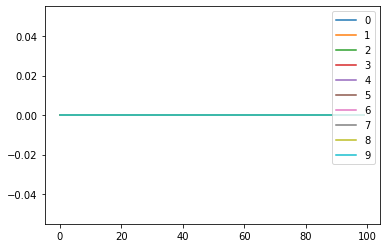

In [34]:
#@title Plotting true mass sample

for i in range(sites):
    plt.plot(range(length), sample[i], label = i)
plt.legend()

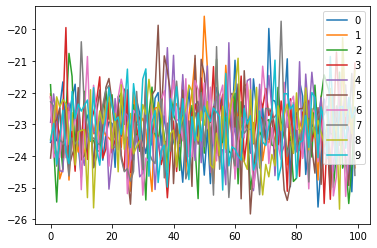

In [82]:
#@title Plotting true Y sample

CArray = convertConcentration(sites, length, sample, V, delta)
Y = convertY(CArray, 1/np.sqrt(errorSquared), 1)

for i in range(sites):
    plt.plot(range(length),Y[i, :], label = i)
plt.legend()

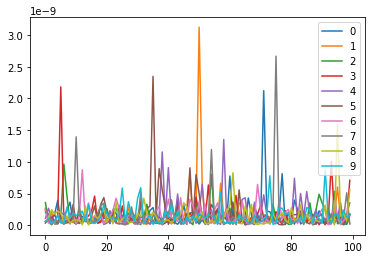

In [85]:
#@title Plotting true Y sample - Converted from log

for i in range(sites):
    plt.plot(range(length),np.e**Y[i, :], label = i)
plt.legend()

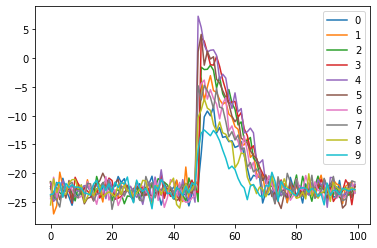

In [87]:
#@title Plotting Y sample determined from parameters

massSample = getSample(sites, length, pmat, np.mean(alphaArray), np.mean(betaArray), phi[2], 
                       [int(np.mean(IArray[:, i])) for i in range(phi[2])], [int(np.mean(TArray[:, t])) for t in range(phi[2])], 
                       [int(np.mean(WArray[:, w])) for w in range(phi[2])], [np.mean(SArray[:, s]) for s in range(phi[2])],
                       seed)

concSample = convertConcentration(sites, length, massSample, V, delta)
ySample = convertY(concSample, 1/np.sqrt(np.mean(tauArray)), 1)

for i in range(sites):
    plt.plot(range(length), ySample[i, :], label = i)
plt.legend()

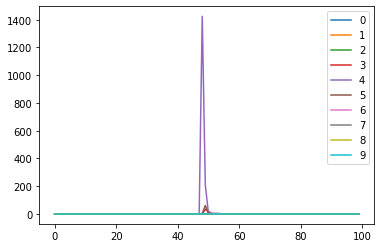

In [88]:
#@title Plotting Y sample determined from parameters - converted from log

for i in range(sites):
    plt.plot(range(length), np.e**ySample[i, :], label = i)
plt.legend()

## Alpha

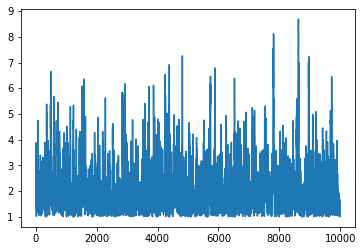

In [41]:
#@title Walk

plt.plot(range(S), alphaArray)

(array([829., 618., 630., 611., 518., 494., 430., 428., 398., 368., 331.,
        252., 289., 299., 226., 226., 211., 192., 211., 137., 157., 150.,
        158., 125.,  95., 131.,  79., 112.,  86.,  87.,  85.,  90.,  54.,
         65.,  65.,  56.,  39.,  48.,  45.,  34.,  42.,  36.,  18.,  27.,
         34.,  17.,  27.,  23.,  31.,  22.,  22.,  13.,  18.,  11.,   8.,
         13.,  12.,  17.,   7.,  17.,   5.,   5.,  11.,   6.,   2.,  13.,
          9.,   6.,   2.,   9.,   6.,   5.,   3.,   5.,   1.,   1.,   2.,
          6.,   2.,   3.,   0.,   3.,   2.,   0.,   8.,   1.,   0.,   1.,
          0.,   2.,   1.,   0.,   1.,   1.,   0.,   2.,   0.,   1.,   0.,
          1.]),
 array([1.00009209, 1.07695271, 1.15381334, 1.23067396, 1.30753458,
        1.38439521, 1.46125583, 1.53811646, 1.61497708, 1.69183771,
        1.76869833, 1.84555896, 1.92241958, 1.99928021, 2.07614083,
        2.15300146, 2.22986208, 2.30672271, 2.38358333, 2.46044396,
        2.53730458, 2.6141652 , 2.69102583, 2.

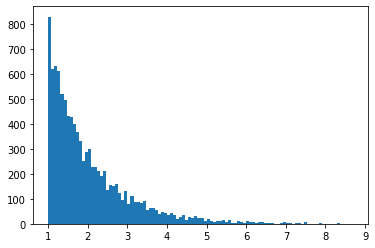

In [42]:
#@title Histogram

plt.hist(alphaArray[:S], bins = 100)

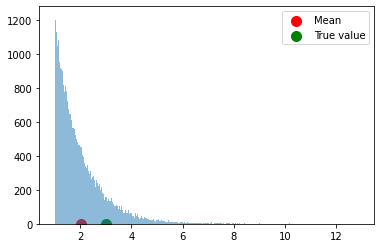

In [43]:
#@title PDF of prior

plotPDF(alphaPrior, np.mean(alphaArray[:S]), 3)

## Beta

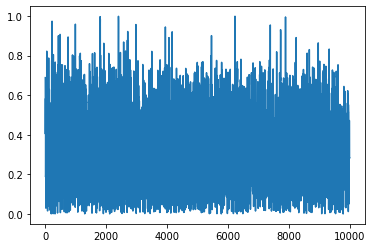

In [44]:
#@title Walk

plt.plot(range(S), betaArray[:S])

(array([183., 146., 210., 122., 185., 128., 187., 161., 172., 147., 238.,
        180., 161., 138., 143., 142., 133., 146., 148., 177., 187., 124.,
        167., 168., 108., 156., 162., 158., 194., 170., 149., 141., 137.,
        145., 124., 145., 129., 142., 120., 120., 140., 135., 137., 102.,
        134., 132., 115., 150., 132., 107., 147., 137., 123., 120.,  99.,
        126., 107., 102., 103., 105., 120., 119.,  67., 113.,  94., 119.,
        105.,  74.,  68.,  63.,  66.,  50.,  48.,  50.,  43.,  19.,  16.,
         22.,   3.,   7.,   6.,  13.,  10.,   3.,   0.,   0.,   8.,   1.,
          0.,   4.,  10.,   3.,   4.,   2.,   4.,   9.,   0.,   4.,   1.,
          6.]),
 array([2.14191381e-04, 1.01968118e-02, 2.01794322e-02, 3.01620525e-02,
        4.01446729e-02, 5.01272933e-02, 6.01099137e-02, 7.00925341e-02,
        8.00751545e-02, 9.00577749e-02, 1.00040395e-01, 1.10023016e-01,
        1.20005636e-01, 1.29988256e-01, 1.39970877e-01, 1.49953497e-01,
        1.59936118e-01, 1.6991

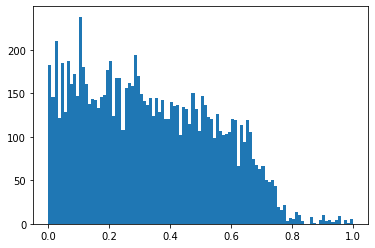

In [45]:
#@title Histogram

plt.hist(betaArray[:S], bins = 100)

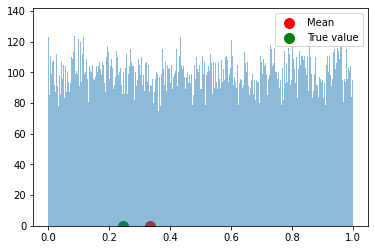

In [62]:
#@title PDF of prior

plotPDF(betaPrior, np.mean(betaArray[:S]), trueBeta)

## Tau

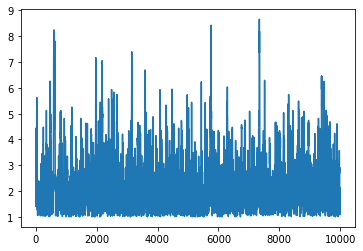

In [47]:
#@title Walk

plt.plot(range(S), tauArray[:S])

(array([657., 579., 499., 465., 474., 427., 396., 416., 384., 382., 373.,
        297., 294., 302., 251., 280., 244., 256., 181., 180., 187., 151.,
        159., 141., 150., 124.,  86., 123.,  88., 101.,  80.,  86.,  78.,
         80.,  69.,  72.,  64.,  58.,  58.,  51.,  45.,  42.,  37.,  48.,
         55.,  24.,  35.,  33.,  20.,  27.,  27.,  13.,  15.,  24.,  14.,
         13.,  20.,  12.,  17.,   6.,   3.,  14.,   8.,  10.,  12.,   6.,
          3.,   4.,   6.,   2.,   4.,   4.,   2.,   5.,   6.,   2.,   0.,
          0.,   0.,   2.,   1.,   3.,   2.,   5.,   4.,   3.,   1.,   0.,
          1.,   1.,   1.,   4.,   4.,   1.,   3.,   0.,   1.,   0.,   0.,
          2.]),
 array([1.00033475, 1.07684865, 1.15336256, 1.22987646, 1.30639036,
        1.38290427, 1.45941817, 1.53593207, 1.61244597, 1.68895988,
        1.76547378, 1.84198768, 1.91850159, 1.99501549, 2.07152939,
        2.14804329, 2.2245572 , 2.3010711 , 2.377585  , 2.45409891,
        2.53061281, 2.60712671, 2.68364061, 2.

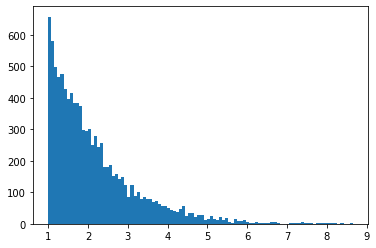

In [48]:
#@title Histogram

plt.hist(tauArray[:S], bins = 100)

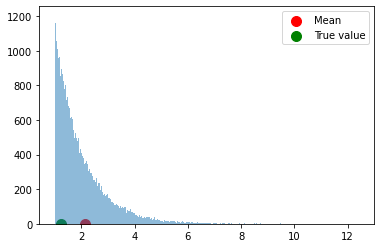

In [63]:
#@title PDF of prior

plotPDF(tauPrior, np.mean(tauArray[:S]), errorSquared)

## T

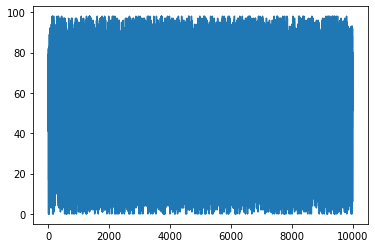

In [50]:
#@title Walk

plt.plot(range(S), TArray[:S])

(array([112.,  97.,  99., 107., 112.,  97., 101.,  88.,  94., 122.,  87.,
        106., 102.,  97., 102., 113., 101., 113.,  89.,  96.,  98., 113.,
         99.,  97., 122.,  90.,  94., 115.,  90., 110., 110.,  98., 117.,
         93.,  96.,  96., 108., 102.,  94., 106., 108., 105., 115.,  84.,
         93., 120.,  94.,  91.,  90.,   0., 113.,  88.,  95.,  96., 111.,
        104.,  84., 102., 108.,  98.,  87., 102., 100., 105., 107., 113.,
         91., 108., 103.,  82., 120., 106., 110.,  99., 113.,  87., 101.,
        111.,  92., 115., 102., 101., 112.,  91.,  82.,  95., 104.,  94.,
        105.,  88.,  97., 104., 108., 116.,  87., 105.,  96.,  99.,  99.,
         81.]),
 array([ 0.  ,  0.98,  1.96,  2.94,  3.92,  4.9 ,  5.88,  6.86,  7.84,
         8.82,  9.8 , 10.78, 11.76, 12.74, 13.72, 14.7 , 15.68, 16.66,
        17.64, 18.62, 19.6 , 20.58, 21.56, 22.54, 23.52, 24.5 , 25.48,
        26.46, 27.44, 28.42, 29.4 , 30.38, 31.36, 32.34, 33.32, 34.3 ,
        35.28, 36.26, 37.24, 38.22

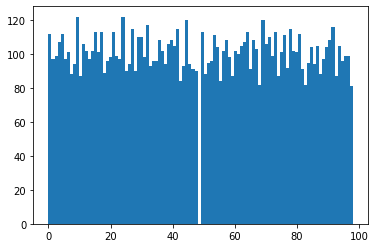

In [51]:
#@title Histogram

plt.hist(TArray[:, :S], bins = 100)

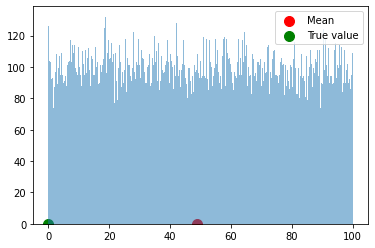

In [52]:
plotPDF(TPrior, np.mean(TArray[:, :S]), 0)

## W

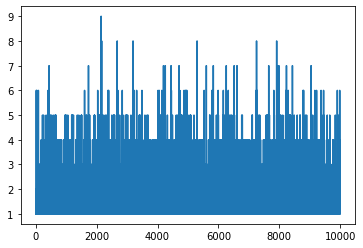

In [53]:
#@title Walk

plt.plot(range(S), WArray[:S])

(array([6.296e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.326e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 8.480e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.340e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.280e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.300e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.800e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

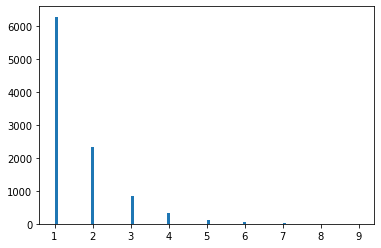

In [54]:
#@title Histogram

plt.hist(WArray[:, :S], bins = 100)

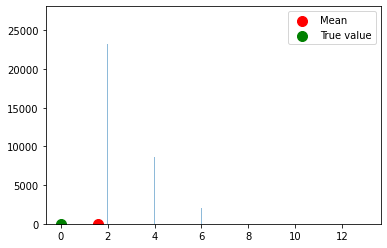

In [55]:
#@title PDF of Prior
plotPDF(WPrior, np.mean(WArray[:, :S]), 0)

## S


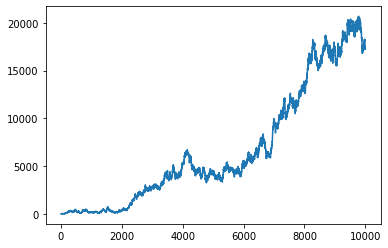

In [56]:
#@title Walk
plt.plot(range(S), SArray[:S])

(array([898., 954., 335.,  53.,  63.,  33.,  37.,  55.,  60., 109., 110.,
         91., 176., 222.,  96.,  64.,  63., 188., 279., 365., 406., 339.,
        359., 206., 126., 149., 115.,  67., 172., 174., 188.,  88.,  61.,
         29.,  50.,  39.,  45.,  46.,  30.,  10.,   8.,  10.,  10.,  40.,
         59.,  31.,  34.,  16.,  63.,  87.,  49.,  31.,  28.,  45.,  79.,
         73.,  87.,  60.,  45.,  22.,  32.,  48.,  40.,  25.,  42.,  27.,
         22.,  10.,   6.,   7.,   6.,   5.,  10.,  32.,  40.,  54.,  80.,
         90.,  84.,  86., 119., 125., 103., 121., 107.,  95.,  57.,  50.,
         53.,  62.,  61.,  49.,  40.,  92.,  81.,  78.,  62.,  44.,  21.,
          7.]),
 array([1.00000000e+00, 2.07855711e+02, 4.14711422e+02, 6.21567132e+02,
        8.28422843e+02, 1.03527855e+03, 1.24213426e+03, 1.44898998e+03,
        1.65584569e+03, 1.86270140e+03, 2.06955711e+03, 2.27641282e+03,
        2.48326853e+03, 2.69012424e+03, 2.89697995e+03, 3.10383566e+03,
        3.31069137e+03, 3.5175

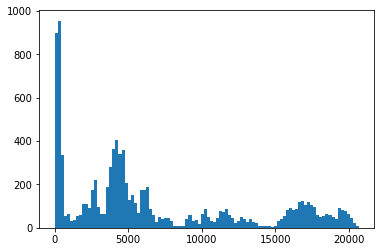

In [57]:
#@title Histogram
plt.hist(SArray[:, :S], bins = 100)

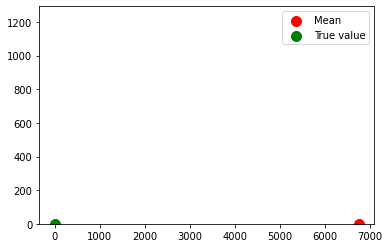

In [58]:
#@title PDF of Prior
plotPDF(SPrior, np.mean(SArray[:, :S]), 0)

## I

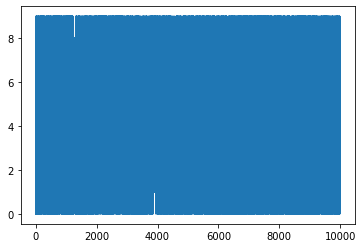

In [59]:
#@title Walk
plt.plot(range(S), IArray[:S])

(array([1031.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,  981.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  984.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  948.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 1052.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1048.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 1068.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  958.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  975.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         955.]),
 array([0.  , 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.9 ,
        0.99, 1.08, 1.17, 1.26, 1.35, 1.44, 1.53, 1.62, 1.71, 1.8 , 1.89,
        1.98, 2.07, 2.16, 2.25, 2.34, 2.43, 2.52, 2.61

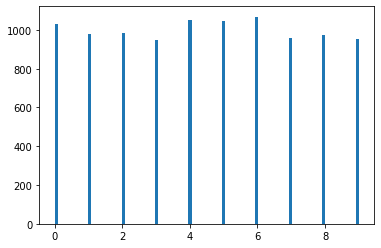

In [60]:
#@title Histogram
plt.hist(IArray[:S], bins = 100)

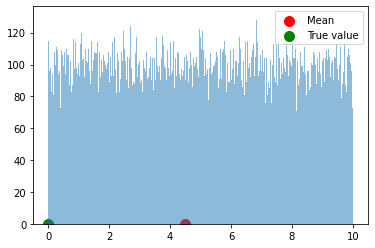

In [61]:
plotPDF(IPrior, np.mean(IArray[:, :S]), 0)